In [1]:
import numpy as np
from newsenv import rand_simple_news_3
from newsenv import rand_news
import random
import matplotlib.pyplot as plt
from learning import CBT

In [2]:
def to_CBT(context):
    u=int(context['user'])    
    return u   

In [3]:
def run_simulation(agent,env,num_iterations,epsilon,lr):
    cost_sum = 0.
    o_cost_sum=0
    ctr = []
    o_ctr=[]
    test_data=[]
    for i in range(1, num_iterations+1):
        context=env.get_context()
        context_i=to_CBT(context)
        action=agent.act(context_i,epsilon)        
        cost = env.get_cost(context, action)
        cost_sum += cost
        agent.update(context_i,action,-1*cost,epsilon,lr)           
        ctr.append(-1*cost_sum/i)
        o_action=env.get_e_optimal_action(context,epsilon) #Obtaining reward accoeding to e-optimal action
        o_cost=env.get_cost(context,o_action)
        o_cost_sum+=o_cost
        o_ctr.append(-1*o_cost_sum/i)
    return ctr,cost_sum,o_ctr,o_cost_sum

In [4]:
def plot_ctr(avg_ctr,avg_o_ctr,maxP,minP):
    mean_ctr=np.mean(avg_ctr,axis=0)
    std_ctr=np.std(avg_ctr,axis=0)
    mean_o_ctr=np.mean(avg_o_ctr,axis=0)
    std_o_ctr=np.std(avg_o_ctr,axis=0)
    x=range(1,len(mean_ctr)+1)
    eve=int(len(x)/10)
    plt_lim=0.2
    plt.errorbar(x,mean_ctr,yerr=std_ctr,errorevery=eve,label='Learnt',fmt='--b')
    plt.errorbar(x,mean_o_ctr,yerr=std_o_ctr,errorevery=eve,label='Optimal',fmt='--r')
    plt.xlabel('num_iterations', fontsize=14)
    plt.ylabel('ctr', fontsize=14)
    plt.ylim([minP*(1-plt_lim),maxP*(1+plt_lim)])
    plt.legend()
    plt.grid()

Optimal Policy:  [0 1 2 7 4 5 8 3 9 6]
Trained Policy:  [0 4 2 7 4 5 8 3 9 6]
----------------
Optimal Policy:  [8 4 6 7 5 2 1 3 9 0]
Trained Policy:  [8 4 6 7 5 2 1 3 9 0]
----------------
Optimal Policy:  [4 0 6 7 9 8 5 1 3 2]
Trained Policy:  [4 0 6 7 9 8 5 1 3 2]
----------------
Optimal Policy:  [2 8 5 4 9 1 3 6 0 7]
Trained Policy:  [2 8 5 4 9 1 3 6 0 7]
----------------
Optimal Policy:  [2 9 4 0 5 7 3 6 8 1]
Trained Policy:  [2 9 4 0 5 7 3 6 8 1]
----------------
Optimal total reward: 76593.2 Algorithm total reward: 68989.6


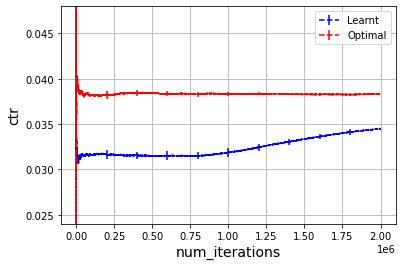

In [5]:
num_user=10
num_action=10
maxP=0.04
minP=0.03
num_states=num_user
num_iter=2000000
eps=0.2
lr=5e-4
num_avg=5
avg_ctr=[]
avg_cost_sum=[]
avg_o_ctr=[]
avg_o_cost_sum=[]
for _ in range(num_avg):
    env=rand_simple_news_3(num_user,num_action,maxP,minP)        
    agent=CBT(num_states,num_action)
    ctr,cost_sum,o_ctr,o_cost_sum=run_simulation(agent,env,num_iter,eps,lr)
    avg_ctr.append(ctr)
    avg_cost_sum.append(cost_sum)
    avg_o_ctr.append(o_ctr)
    avg_o_cost_sum.append(o_cost_sum)
    print('Optimal Policy: ',env.interest)    
    print('Trained Policy: ',agent.get_policy())
    print('----------------')

plot_ctr(avg_ctr,avg_o_ctr,maxP,minP)
print('Optimal total reward: '+str(-1*np.mean(avg_o_cost_sum))+' Algorithm total reward: '+str(-1*np.mean(avg_cost_sum)))